# Protótipo do Dashboard
Neste protótipo, é feita uma demonstração de como, possivelmente, está a visualização ará no dashboard WEB dos gráficos.

#### Importando bibliotecas

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("lib")
import databaseinsert

#### Recuperando dados
É chamada a função que realiza a conexão com o banco de dados e cria-se um dataframe com os dados recuperados.

In [18]:
df = databaseinsert.get_database()
df_wordRanking = df.rename(columns={'count':'Count', 'position':'Position', })
df_wordRanking.head()

,Count,Position,word
0,25,1,mulheres
1,20,2,contra
2,18,3,vítima
3,18,4,anos
4,14,5,assédio


##### Resumo do ranking de palavras

In [19]:
# Resumo estatístico do ranking de palavras
df_wordRanking.describe()

,Count,Position
count,51.000000,51.000000
mean,7.666667,25.980392
std,4.169732,14.833058
min,5.000000,1.000000
25%,6.000000,13.500000
50%,6.000000,26.000000
75%,7.500000,38.500000
max,25.000000,50.000000


In [20]:
# Definindo como index a quantidade de vezes que a palavra aparece
df2 = pd.DataFrame(df_wordRanking.set_index('Count'))

In [21]:
df2.head()

,Position,word
Count,,
25,1,mulheres
20,2,contra
18,3,vítima
18,4,anos
14,5,assédio


In [22]:
# Retira o nome do index
df2.index.name = None
df_final = df2.head(5)
df_final

,Position,word
25,1,mulheres
20,2,contra
18,3,vítima
18,4,anos
14,5,assédio


Frequência com que a palavra aparece quando se tratamos essa temática

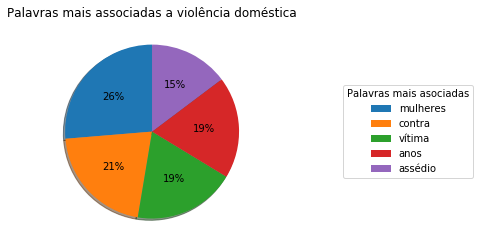

In [23]:
plt.pie(df_final.index,  autopct="%.f%%", shadow=True, startangle=90)
plt.legend(df_final['word'], title="Palavras mais asociadas",loc="center right", bbox_to_anchor=(1, 0, 1, 1))
plt.title("Palavras mais associadas a violência doméstica")
plt.show()